In [2]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid", {
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True
})
sns.set(font_scale=1)
#sns.set_style("darkgrid")
#sns.set_context("poster")
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
%matplotlib inline
import sys
import os
from scipy.optimize import newton, minimize, fsolve
import numpy as np
import copy
import re

import matplotlib.colors as mcolors
palette = list(mcolors.TABLEAU_COLORS.keys())
palette.extend(['salmon', 'teal','yellowgreen'])

In [95]:
df = pd.read_csv('oct30_nucl_salvage_2.tab', sep='\t')

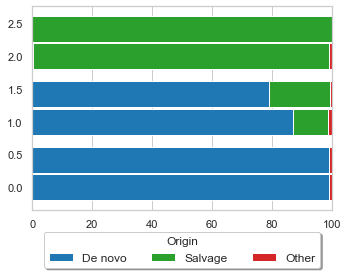

In [97]:
pdf_plot = matplotlib.backends.backend_pdf.PdfPages('oct30_nucl_salvage_plot.pdf')

new_pal = palette[:]
new_pal.pop(1)

N = 3
width = 0.4          # the width of the bars: can also be len(x) sequence
ind = dict()
ind['ATP'] = np.arange(N)    # the x locations for the groups
ind['GTP'] = np.arange(N) + 0.42

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1,1,1)
plot_objs = []
iso_list = []
ratio_sum = dict()
ratio_sum['ATP'] = np.zeros(N)
ratio_sum['GTP'] = np.zeros(N)

isotopologues = ['De novo', 'Salvage', 'Other']
for i, iso in enumerate(isotopologues):
    iso_list.append(iso)
    for cmp in ['ATP', 'GTP']:
        
        df_sele = df[(df['Isotopologue'] == iso) & (df['Compound'] == cmp)]
        ratio_iso = df_sele['Ratio'].values
        p = ax.barh(ind[cmp], ratio_iso, width, left=ratio_sum[cmp], color=new_pal[i])
        ratio_sum[cmp] += ratio_iso
    plot_objs.append(p)


#plt.title('{}, {} ASNase, {}'.format(compound_name, ASNase, Compartment), size=17)
#plt.ylabel('Ratio (%)', size=14)
#plt.ylim([0, 100])
#plt.xticks(ind, labels)
#plt.xticks(rotation=45)

#plt.legend([p[1] for p in plot_objs], list(map(str, iso_list)), loc='upper left', bbox_to_anchor=(1.04, 1), borderaxespad=0, fontsize=12, title='Origin', title_fontsize=12)

plt.legend([p[1] for p in plot_objs], list(map(str, iso_list)), loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5, fontsize=12, title='Origin', title_fontsize=12, borderaxespad=1)


plt.tight_layout()
#plt.close()

pdf_plot.savefig(fig)
pdf_plot.close()

In [ ]:
df = pd.read_csv('oct30_nucl_salvage_1.tab', sep='\t')

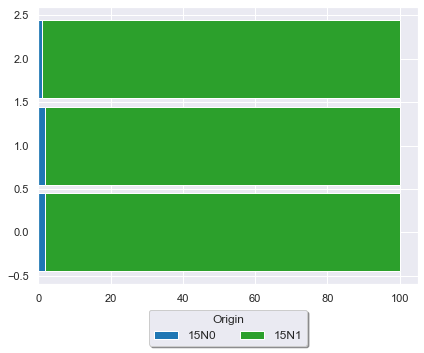

In [70]:
pdf_plot = matplotlib.backends.backend_pdf.PdfPages('oct30_nucl_Gln_plot.pdf')

new_pal = palette[:]
new_pal.pop(1)

N = 3
width = 0.9          # the width of the bars: can also be len(x) sequence
ind = dict()
ind['Gln'] = np.arange(N)


fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(1,1,1)
plot_objs = []
iso_list = []
ratio_sum = dict()
ratio_sum['Gln'] = np.zeros(N)


isotopologues = ['15N0', '15N1']
for i, iso in enumerate(isotopologues):
    iso_list.append(iso)
    for cmp in ['Gln']:
        
        df_sele = df[(df['Isotopologue'] == iso) & (df['Compound'] == cmp)]
        ratio_iso = df_sele['Ratio'].values
        p = ax.barh(ind[cmp], ratio_iso, width, left=ratio_sum[cmp], color=new_pal[i])
        ratio_sum[cmp] += ratio_iso
    plot_objs.append(p)

plt.legend([p[1] for p in plot_objs], list(map(str, iso_list)), loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5, fontsize=12, title='Origin', title_fontsize=12, borderaxespad=1)


plt.tight_layout()
#plt.close()

pdf_plot.savefig(fig)
pdf_plot.close()

In [81]:
df = pd.read_csv('oct30_nucl_salvage_3.tab', sep='\t')

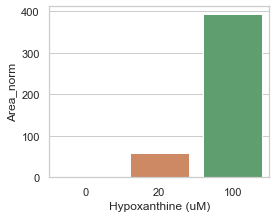

In [90]:
pdf_plot = matplotlib.backends.backend_pdf.PdfPages('oct30_nucl_Hypo_plot.pdf')

fig = plt.figure(figsize=(4, 3.2))
sns.set(style="whitegrid")
g = sns.barplot(y='Area_norm', x='Hypoxanthine (uM)', data=df)
#g.set_yscale("log")


plt.tight_layout()
#plt.close()

pdf_plot.savefig(fig)
pdf_plot.close()